In [ ]:
! pip install scanpy igraph-python leidenalg louvain

The following tutorial describes a simple PCA-based method for integrating data we call ingest and compares it with BBKNN [Polanski19]. BBKNN integrates well with the Scanpy workflow and is accessible through the bbknn function.

The ingest function assumes an annotated reference dataset that captures the biological variability of interest. The rational is to fit a model on the reference data and use it to project new data. For the time being, this model is a PCA combined with a neighbor lookup search tree, for which we use UMAP’s implementation [McInnes18]. Similar PCA-based integrations have been used before, for instance, in [Weinreb18].

As ingest is simple and the procedure clear, the workflow is transparent and fast.
Like BBKNN, ingest leaves the data matrix itself invariant.
Unlike BBKNN, ingest solves the label mapping problem (like scmap) and maintains an embedding that might have desired properties like specific clusters or trajectories.
We refer to this asymmetric dataset integration as ingesting annotations from an annotated reference adata_ref into an adata that still lacks this annotation. It is different from learning a joint representation that integrates datasets in a symmetric way as BBKNN, Scanorma, Conos, CCA (e.g. in Seurat) or a conditional VAE (e.g. in scVI, trVAE) would do, but comparable to the initiall MNN implementation in scran. Take a look at tools in the external API or at the ecoystem page to get a start with other tools.

In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [3]:
sc.settings.verbosity=1
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                         7.1.2
astor                       0.8.1
bottleneck                  1.3.2
cached_property             1.5.2
cffi                        1.14.6
cloudpickle                 1.3.0
cycler                      0.10.0
cython_runtime              NA
dask                        2.12.0
dateutil                    2.8.2
debugpy                     1.0.0
decorator                   4.4.2
google                      NA
h5py      

In [19]:
adata_ref = sc.datasets.pbmc3k_processed()  # this is an earlier version of the dataset from the pbmc3k tutorial
adata = sc.datasets.pbmc68k_reduced()

In [20]:
# to use ingest, data need to be defined on the same variables
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [21]:
# the model and graph trained on the reference data will explain the biological variation observed within it
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

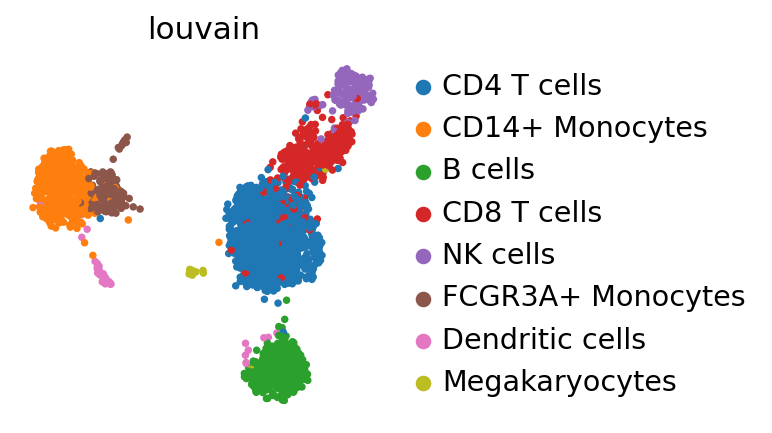

In [22]:
sc.pl.umap(adata_ref, color='louvain')

In [23]:
# Mapping PBMCs using ingest
sc.tl.ingest(adata, adata_ref, obs='louvain')

TypeError: ignored

In [ ]:
adata.uns['louvain_colors'] = adata_ref.uns['louvain_colors'] # fix colors

In [ ]:
sc.pl.umap(adata, color=['louvain', 'bulk_labels'], wspace=0.5)

In [ ]:
adata